# [3차 프로그래밍 과제]

### 1. II. 데이터 셋에서 주어진 특징들을 선택하여 CPU 성능 즉, “PRP” 변수를 예측하는 LinearRegression 기반 다중 선형 회귀 모델링을 프로그래밍 하시오.
* 데이터 탐색 및 시각화, 전처리, 훈련 데이터와 테스트 데이터 분리, 훈련 데이터 학습과정, 교차 검증, 분석 결과 시각화 등을 포함하여 최적화하는 전체 과정을 포함하시오.

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msn
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

교차 검증 RMSE 점수: [220.74784669  70.87905517  27.71611229  32.45548327  75.46720188
  46.37982638  86.60604546  41.73403388  24.66908997  22.77555083]
평균 RMSE: 64.94302458115456
테스트 데이터 RMSE: 119.15401555634443
테스트 데이터 R^2: 0.7211047523502274


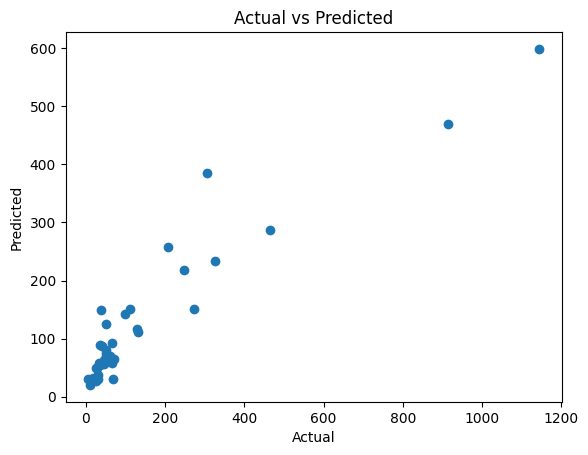

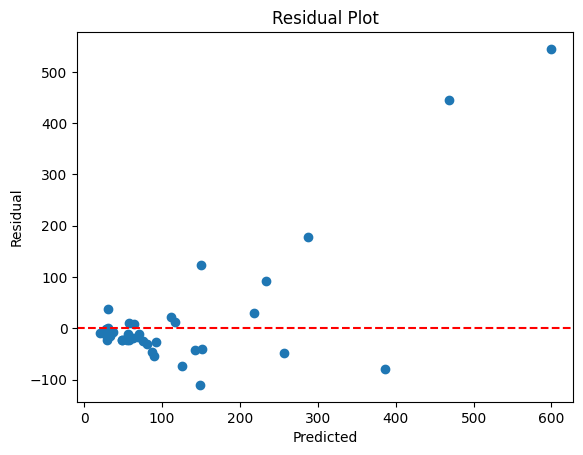

In [59]:
# 데이터 로드
data = pd.read_csv("machine_data.csv")

# 범주형 변수 더미 변수화
data = pd.get_dummies(data, columns=['VendorName', 'ModelName'])

# 특성과 목표 변수 분리
X = data.drop('PRP', axis=1)
y = data['PRP']

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

scores = cross_val_score(model, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
print("교차 검증 RMSE 점수:", rmse_scores)
print("평균 RMSE:", rmse_scores.mean())

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("테스트 데이터 RMSE:", rmse)
print("테스트 데이터 R^2:", r2)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.title("Residual Plot")
plt.axhline(0, color='red', linestyle='--')
plt.show()


### 2. (1) 단계에서 얻은 다중 선형 회귀 모델을 사용하여 학습 데이터와 테스트 데이터 각각에 대해 이 모델의 성능을 평가하시오. 
* Mean squared Error, Mean absolute Error, R^2, 교차검증

In [54]:
# # 예측 수행
# y_pred = model.predict(X_test)

# # 모델 평가
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f'Mean Squared Error: {mse}')
# print(f'R^2 Score: {r2}')

# Note : 
# 학습 데이터 성능 평가
y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("학습 데이터 MSE:", mse_train)
print("학습 데이터 MAE:", mae_train)
print("학습 데이터 R^2:", r2_train)

# 테스트 데이터 성능 평가
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("테스트 데이터 MSE:", mse_test)
print("테스트 데이터 MAE:", mae_test)
print("테스트 데이터 R^2:", r2_test)

# 교차 검증
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()
print(f'Cross-Validation MSE: {cv_mse}')

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_mae = -cv_scores.mean()
print(f'Cross-Validation MAE: {cv_mae}')

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
cv_r2 = -cv_scores.mean()
print(f'Cross-Validation r2: {cv_r2}')


학습 데이터 MSE: 7.301099460771075e-26
학습 데이터 MAE: 2.0116443441160202e-13
학습 데이터 R^2: 1.0
테스트 데이터 MSE: 14197.67942320157
테스트 데이터 MAE: 56.141902912432116
테스트 데이터 R^2: 0.7211047523502274
Cross-Validation MSE: 7826.668098262526
Cross-Validation MAE: 42.45962417336615
Cross-Validation r2: -0.6934173849242468


### 3. (2) 단계에서 얻은 모델의 테스트 데이터에 대해 R^2가 90% 이상이 나오도록 모델을 개선하시오.

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# 데이터 로드
data = pd.read_csv("machine_data.csv")

# 범주형 변수 더미 변수화
data = pd.get_dummies(data, columns=['VendorName', 'ModelName'])

# 상관계수 행렬 계산
corr_matrix = data.corr()

# PRP 변수와의 상관계수 추출
corr_with_prp = corr_matrix['PRP']

# 절대값 상관계수로 변환 후 정렬
corr_with_prp_abs = np.abs(corr_with_prp)
top_features = corr_with_prp_abs.sort_values(ascending=False).index[1:7]
print("상관도가 높은 특징 6개 :", top_features)

# 선택한 상관도 높은 특징 6개 사용
X = data[top_features]
y = data['PRP']

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 학습 데이터 성능 평가
y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("학습 데이터 MSE:", mse_train)
print("학습 데이터 MAE:", mae_train)
print("학습 데이터 R^2:", r2_train)

# 테스트 데이터 성능 평가
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("테스트 데이터 MSE:", mse_test)
print("테스트 데이터 MAE:", mae_test)
print("테스트 데이터 R^2:", r2_test)

# 교차 검증
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()
print(f'Cross-Validation MSE: {cv_mse}')

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_mae = -cv_scores.mean()
print(f'Cross-Validation MAE: {cv_mae}')

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
cv_r2 = -cv_scores.mean()
print(f'Cross-Validation r2: {cv_r2}')


상관도가 높은 특징 6개 : Index(['MMAX', 'MMIN', 'CACH', 'CHMIN', 'CHMAX', 'ModelName_1100/94'], dtype='object')
학습 데이터 MSE: 1491.034360481997
학습 데이터 MAE: 24.99705690169501
학습 데이터 R^2: 0.9224407313211516
테스트 데이터 MSE: 9536.323773000091
테스트 데이터 MAE: 45.74893334507774
테스트 데이터 R^2: 0.8126711203245687
Cross-Validation MSE: 4518.315032594199
Cross-Validation MAE: 30.389762494763158
Cross-Validation r2: -0.8052656982519538
